In [1]:
import numpy as np
import os

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_train_full


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train_full


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

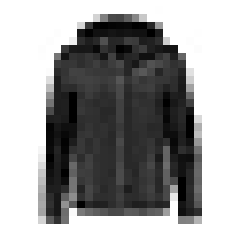

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

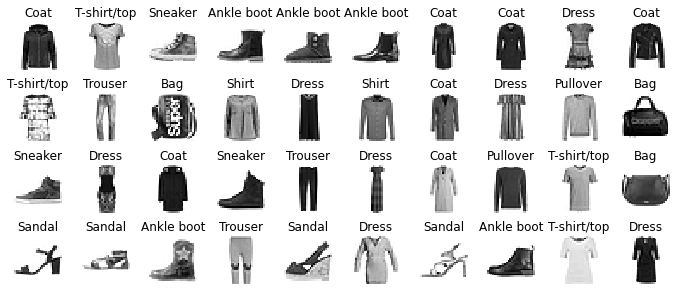

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

**Construct a Model**

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
keras.backend.clear_session()
np.random.seed(42)

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer(hidden1.name) is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.01426528, -0.05678183,  0.06901664, ...,  0.04622306,
         0.02162708, -0.00727838],
       [-0.03406014, -0.01633919,  0.03425559, ...,  0.07004879,
         0.05700889,  0.02884415],
       [ 0.04959118, -0.06911285,  0.05836965, ..., -0.02444835,
         0.04492474, -0.04723002],
       ...,
       [ 0.05456525, -0.02955976, -0.00108967, ..., -0.04281127,
        -0.01899314, -0.0082356 ],
       [-0.05000725,  0.0707106 , -0.00546237, ...,  0.0601017 ,
         0.07372776, -0.06445608],
       [-0.02996872,  0.01      ,  0.01847268, ..., -0.04406995,
         0.01598193,  0.06942643]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7091 - accuracy: 0.7673 - val_loss: 0.5273 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8303 - val_loss: 0.4504 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4422 - accuracy: 0.8447 - val_loss: 0.4239 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4167 - accuracy: 0.8532 - val_loss: 0.3969 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3948 - accuracy: 0.8612 - val_loss: 0.3871 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8662 - val_loss: 0.3647 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8707 - val_loss: 0.3650 - val_accuracy:

In [33]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot learning Curves**

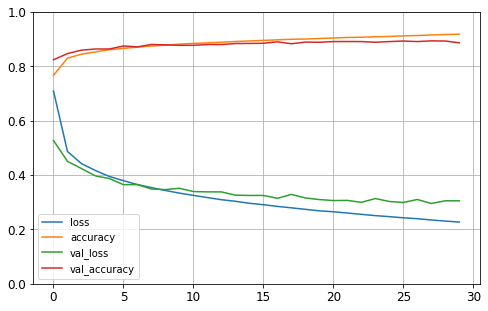

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8763


[0.3407367765903473, 0.8762999773025513]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(6)

array([[1.00000e-05, 0.00000e+00, 3.00000e-06, 2.00000e-06, 1.00000e-06,
        1.10880e-02, 5.00000e-06, 8.87000e-03, 7.50000e-05, 9.79947e-01],
       [1.90000e-05, 0.00000e+00, 9.94651e-01, 0.00000e+00, 2.80500e-03,
        0.00000e+00, 2.52500e-03, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.80000e-05, 9.99969e-01, 1.00000e-06, 1.00000e-06, 1.00000e-06,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

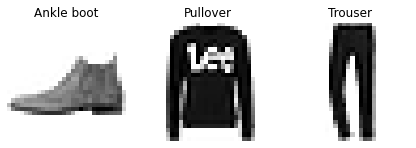

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**EXERCICE**

**1) Plot Learning curves when using different optimizers**




optimizers: Adam

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3759 - accuracy: 0.8635 - val_loss: 0.3955 - val_accuracy: 0.8602
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3284 - accuracy: 0.8790 - val_loss: 0.3715 - val_accuracy: 0.8654
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3075 - accuracy: 0.8870 - val_loss: 0.3380 - val_accuracy: 0.8752
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.8933 - val_loss: 0.3194 - val_accuracy: 0.8816
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.8984 - val_loss: 0.3230 - val_accuracy: 0.8824
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2610 - accuracy: 0.9021 - val_loss: 0.3215 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2473 - accuracy: 0.9071 - val_loss: 0.3236 - val_accuracy:

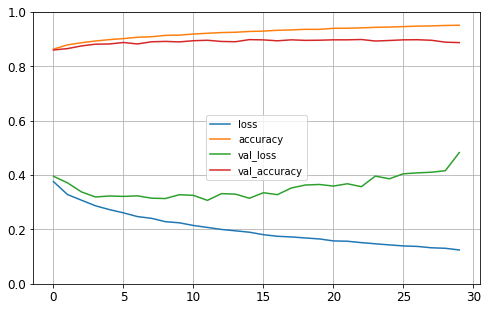

In [43]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.8888


[0.5050442218780518, 0.8888000249862671]

optimizers:RMSprop

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [46]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1265 - accuracy: 0.9517 - val_loss: 0.5449 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1325 - accuracy: 0.9521 - val_loss: 0.5993 - val_accuracy: 0.8972
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1413 - accuracy: 0.9500 - val_loss: 0.6804 - val_accuracy: 0.8908
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1477 - accuracy: 0.9485 - val_loss: 0.6524 - val_accuracy: 0.8868
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1566 - accuracy: 0.9463 - val_loss: 0.7592 - val_accuracy: 0.8986
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1604 - accuracy: 0.9460 - val_loss: 0.8181 - val_accuracy: 0.8870
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1636 - accuracy: 0.9436 - val_loss: 0.7394 - val_accuracy:

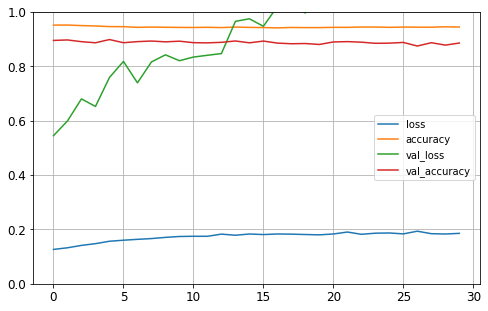

In [47]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.2267 - accuracy: 0.8783


[1.2266614437103271, 0.8783000111579895]

optimizers:SGD

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [50]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 6.0150 - accuracy: 0.3755 - val_loss: 1.3736 - val_accuracy: 0.4444
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4157 - accuracy: 0.4477 - val_loss: 1.3098 - val_accuracy: 0.5252
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.6394 - accuracy: 0.4104 - val_loss: 1.2986 - val_accuracy: 0.4912
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9617 - accuracy: 0.6123 - val_loss: 0.8797 - val_accuracy: 0.6446
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8797 - accuracy: 0.6597 - val_loss: 0.8633 - val_accuracy: 0.6844
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6862 - accuracy: 0.7532 - val_loss: 0.6418 - val_accuracy: 0.7788
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5996 - accuracy: 0.7848 - val_loss: 0.6040 - val_accuracy:

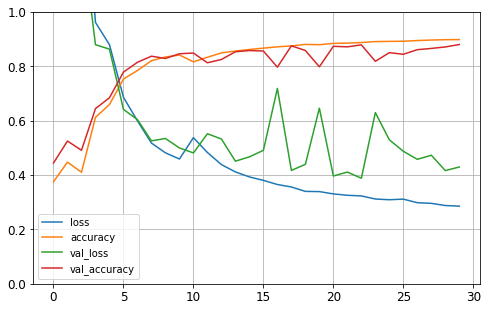

In [51]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8716


[0.4604113698005676, 0.8715999722480774]

**2) Plot Learning curves when using different batch size**

batch-size=10


In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [54]:
history4 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2844 - accuracy: 0.9008 - val_loss: 0.3862 - val_accuracy: 0.8798
Epoch 2/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2443 - accuracy: 0.9117 - val_loss: 0.3784 - val_accuracy: 0.8848
Epoch 3/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2263 - accuracy: 0.9181 - val_loss: 0.3713 - val_accuracy: 0.8866
Epoch 4/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2103 - accuracy: 0.9239 - val_loss: 0.3717 - val_accuracy: 0.8834
Epoch 5/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2023 - accuracy: 0.9265 - val_loss: 0.4107 - val_accuracy: 0.8842
Epoch 6/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.1942 - accuracy: 0.9291 - val_loss: 0.4613 - val_accuracy: 0.8704
Epoch 7/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.1866 - accuracy: 0.9320 - val_loss: 0.4007 - val_ac

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.8866


[0.6047820448875427, 0.8866000175476074]

batch-size=20

In [56]:
history5 = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.0892 - accuracy: 0.9675 - val_loss: 0.6253 - val_accuracy: 0.8866
Epoch 2/30
2750/2750 [==============================] - 8s 3ms/step - loss: 0.0954 - accuracy: 0.9656 - val_loss: 0.6159 - val_accuracy: 0.8992
Epoch 3/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0885 - accuracy: 0.9680 - val_loss: 0.6601 - val_accuracy: 0.8918
Epoch 4/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0927 - accuracy: 0.9669 - val_loss: 0.6572 - val_accuracy: 0.8900
Epoch 5/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0855 - accuracy: 0.9691 - val_loss: 0.6615 - val_accuracy: 0.8942
Epoch 6/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0851 - accuracy: 0.9687 - val_loss: 0.7017 - val_accuracy: 0.8914
Epoch 7/30
2750/2750 [==============================] - 10s 4ms/step - loss: 0.0840 - accuracy: 0.9703 - val_loss: 0.6439 - val_accuracy

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8669 - accuracy: 0.8882


[0.8668552041053772, 0.8881999850273132]

In [58]:
history6 = model.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9837 - val_loss: 0.9225 - val_accuracy: 0.8958
Epoch 2/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9823 - val_loss: 0.9565 - val_accuracy: 0.8860
Epoch 3/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.9616 - val_accuracy: 0.8918
Epoch 4/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9817 - val_loss: 1.0359 - val_accuracy: 0.8906
Epoch 5/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0505 - accuracy: 0.9819 - val_loss: 0.9849 - val_accuracy: 0.8898
Epoch 6/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0469 - accuracy: 0.9827 - val_loss: 0.9822 - val_accuracy: 0.8896
Epoch 7/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9822 - val_loss: 0.9950 - val_accuracy:

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1506 - accuracy: 0.8892


[1.15059232711792, 0.88919997215271]

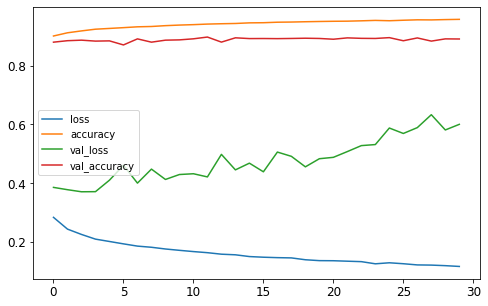

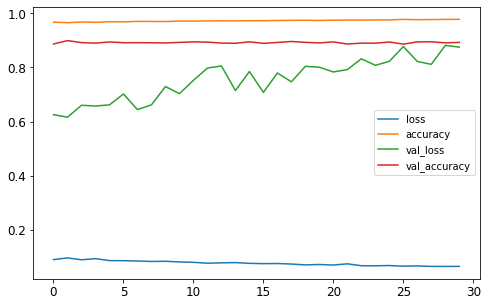

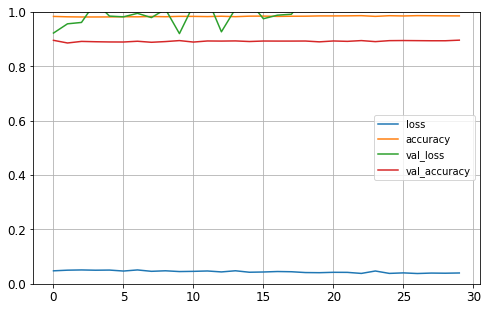

In [60]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


**3) Plot Learning curves when using different number of epochs**

epochs=10


In [61]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 1.0828 - val_accuracy: 0.8946
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9884 - val_loss: 1.2016 - val_accuracy: 0.8930
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9874 - val_loss: 1.1482 - val_accuracy: 0.8922
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 1.1641 - val_accuracy: 0.8944
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 1.1347 - val_accuracy: 0.8956
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0323 - accuracy: 0.9885 - val_loss: 1.2108 - val_accuracy: 0.8904
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0385 - accuracy: 0.9872 - val_loss: 1.1618 - val_accuracy:

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2063 - accuracy: 0.8879


[1.2062832117080688, 0.8878999948501587]

In [63]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0354 - accuracy: 0.9875 - val_loss: 1.2435 - val_accuracy: 0.8900
Epoch 2/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0349 - accuracy: 0.9876 - val_loss: 1.2257 - val_accuracy: 0.8880
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 1.2492 - val_accuracy: 0.8954
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0328 - accuracy: 0.9887 - val_loss: 1.3487 - val_accuracy: 0.8912
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 1.2154 - val_accuracy: 0.8926
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0301 - accuracy: 0.9894 - val_loss: 1.2574 - val_accuracy: 0.8910
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 1.2464 - val_accuracy:

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3967 - accuracy: 0.8890


[1.3967475891113281, 0.8889999985694885]

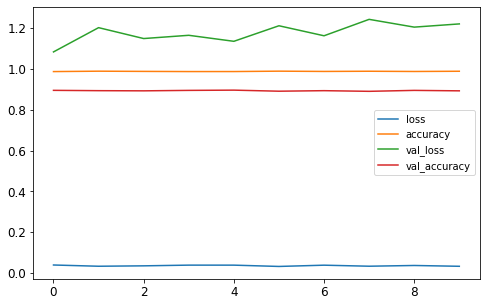

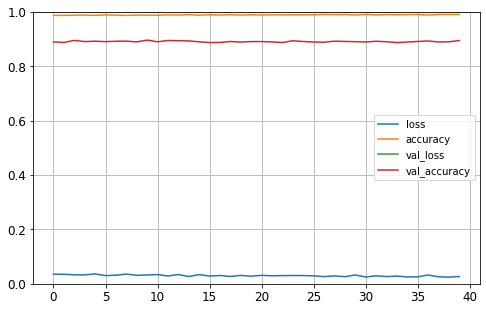

In [65]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**4) repeat with more layers**

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [67]:
model.layers

In [68]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [69]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0679 - accuracy: 0.6136 - val_loss: 0.5860 - val_accuracy: 0.7858
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7133 - accuracy: 0.7434 - val_loss: 0.4914 - val_accuracy: 0.8242
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6231 - accuracy: 0.7795 - val_loss: 0.4438 - val_accuracy: 0.8434
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5778 - accuracy: 0.7935 - val_loss: 0.4175 - val_accuracy: 0.8496
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5443 - accuracy: 0.8070 - val_loss: 0.3993 - val_accuracy: 0.8570
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5176 - accuracy: 0.8168 - val_loss: 0.3895 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4968 - accuracy: 0.8237 - val_loss: 0.3842 - val_accuracy:

In [70]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8710


[0.3590085506439209, 0.8709999918937683]

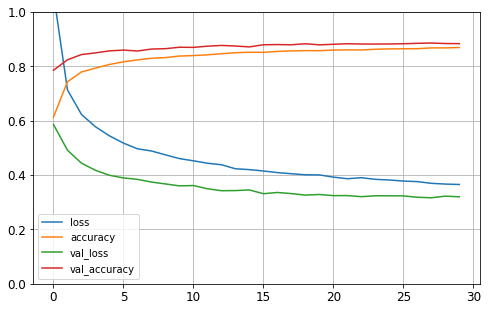

In [71]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**5) apply on different datasets**

In [72]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [73]:
X_train_full.shape

(60000, 28, 28)

In [74]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [75]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [76]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [77]:
class_names[y_train[0]]

'3'

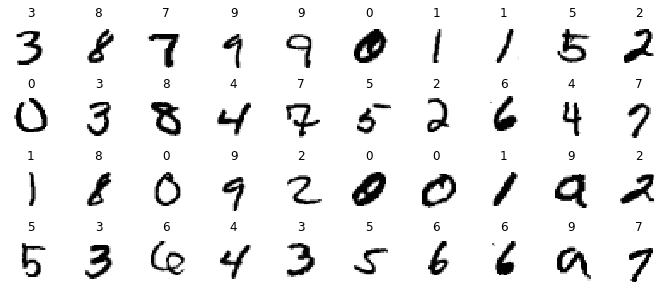

In [78]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [94]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [95]:
keras.backend.clear_session()
np.random.seed(42)

In [96]:
model.layers

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [98]:
hidden1 = model.layers[3]
hidden1.name

'dense_5'

In [99]:
model.get_layer(hidden1.name) is hidden1

True

In [100]:
weights, biases = hidden1.get_weights()

In [101]:
weights

array([[ 0.10231089,  0.06139796, -0.10185234, ...,  0.07739944,
         0.05233685, -0.05785236],
       [ 0.09991994,  0.10378391, -0.06464954, ..., -0.05912201,
         0.00328071, -0.0132878 ],
       [ 0.10696165, -0.0737284 ,  0.01685985, ..., -0.09499359,
         0.00573474,  0.03978144],
       ...,
       [ 0.0392028 , -0.10593101,  0.06924338, ...,  0.09852812,
        -0.02715532, -0.06814128],
       [ 0.08737681,  0.09712801, -0.06666531, ..., -0.03122719,
         0.06602997, -0.02251112],
       [-0.05502006,  0.10878598,  0.0310818 , ...,  0.06439029,
        -0.10800013,  0.0887647 ]], dtype=float32)

In [102]:
weights.shape

(300, 200)

In [103]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [104]:
biases.shape

(200,)

In [105]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [106]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4260 - accuracy: 0.8899 - val_loss: 0.1582 - val_accuracy: 0.9580
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2162 - accuracy: 0.9407 - val_loss: 0.1310 - val_accuracy: 0.9645
Epoch 3/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1811 - accuracy: 0.9509 - val_loss: 0.1293 - val_accuracy: 0.9655
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1637 - accuracy: 0.9564 - val_loss: 0.1097 - val_accuracy: 0.9704
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1487 - accuracy: 0.9596 - val_loss: 0.1032 - val_accuracy: 0.9724
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1420 - accuracy: 0.9613 - val_loss: 0.0981 - val_accuracy: 0.9745
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1320 - accuracy: 0.9649 - val_loss: 0.1049 - val_accuracy:

In [107]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9804


[0.07946762442588806, 0.980400025844574]

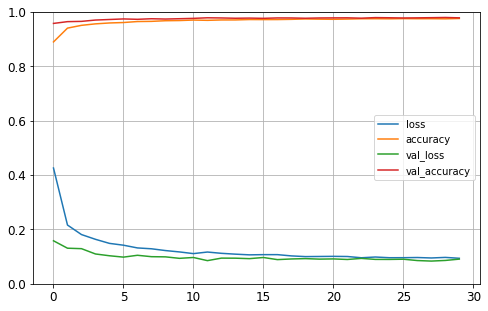

In [108]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
